In [1]:
import matplotlib.pyplot as plt
import numpy as np
from load_data import (
    MOVIE_LEN, FRAME_SHAPE, 
    load_movie, load_ground_truth_generation_data
)
from unet_basic.model_3d import unet3d, unet3d_simply, plot_model
import tensorflow as tf
import data_gen
from importlib import reload
from skimage.io import imshow
from skimage.measure import label
from scipy.ndimage.morphology import distance_transform_edt
import skimage

DATA_PACKED_FOR_GT_GENERATION_PATH = "../dataPackedForGeneration.mat"
MOVIE_PATH = "../preprocessed/preprocessedMovie.h5"

movie = load_movie(MOVIE_PATH)
data_packed = \
    load_ground_truth_generation_data(DATA_PACKED_FOR_GT_GENERATION_PATH)

reload(data_gen)


<module 'data_gen' from 'c:\\Users\\wojci\\Desktop\\UCL 4th\\AB Spikes\\example_code_original\\example_code\\unet\\data_gen.py'>

In [2]:
def display(display_list):
  plt.figure(figsize=(15, 15))

  title = ['Input Image', 'True Mask', 'Predicted Mask']

  for i in range(len(display_list)):
    plt.subplot(1, len(display_list), i+1)
    plt.title(title[i])
    plt.imshow(display_list[i])
    plt.axis('off')
  plt.show()

def show_prediction(dataset, index, prediction=True):

    i = index
    x = dataset[0][i:i+1]
    y = dataset[1][i:i+1]

    frame = x[0, 3]
    dim = frame.shape[:2]
    if prediction:
      predictions = model.predict(x)
      p = np.max(predictions, 3).reshape(dim)
      display([frame.reshape(dim), p, y.reshape(dim)])
    else:
      display([frame.reshape(dim), y.reshape(dim)])


In [28]:
dg = data_gen.DataGenerator(movie, data_packed)

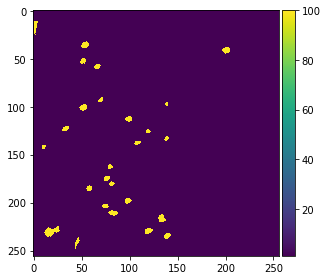

In [30]:
sw = dg.get_sample_weight(10)
indices_range = dg.get_x_range(10)
ys = [dg.get_y(i) for i in indices_range]
y = ys[4]
s = sum(ys)
s = np.minimum(s, np.ones_like(s))
s = s * (14) + 1

np.array(s).shape
# imshow(np.array(s).reshape(y.shape[:2]))

# imshow(sw.reshape((sw.shape[:2])))
x 
imshow

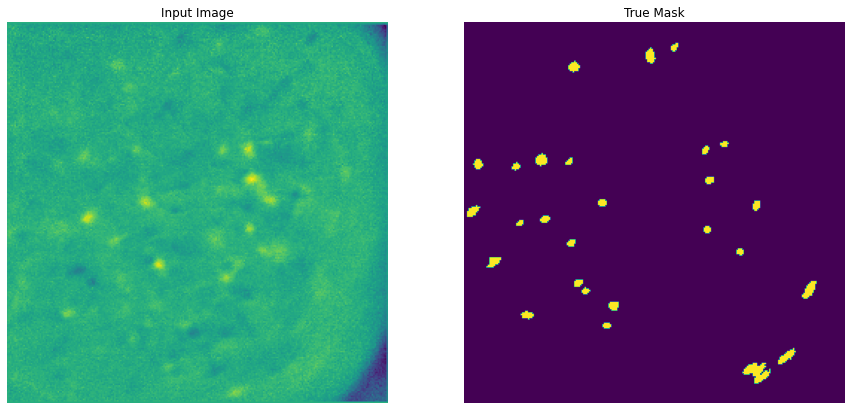

In [37]:
i = 345
x = dg.get_x(i)
dim  = x.shape[1:3]
y = dg.get_sample_weight(i).reshape(dim)
display([x[7].reshape(dim), y])

In [3]:
ds = data_gen.DataSequencer(list(range(10,100)), movie, data_packed, shuffle=False)

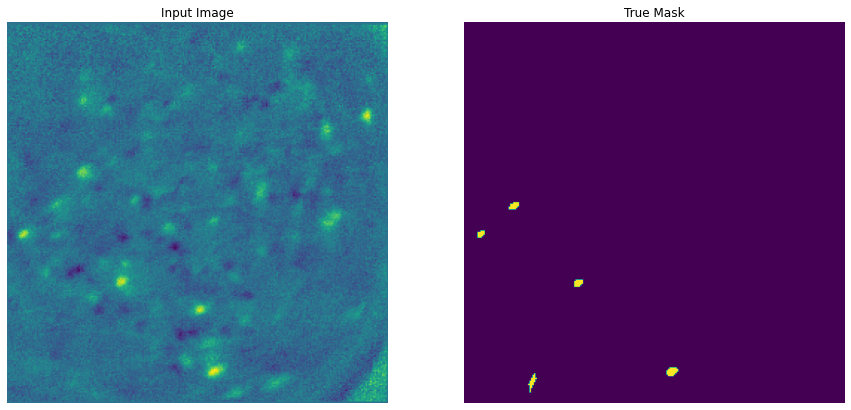

In [54]:
i = 0
x, y = ds[i]
j = 2
x = x[j]
y = y[j]
dim = x.shape[1:3]
display([x[3].reshape(dim), y.reshape(dim)])

In [47]:
dim

(256, 256)

In [5]:
FRAMES_TO_LOAD = 100
indices_all = np.array(range(5,FRAMES_TO_LOAD-5))

# Parameters
params = {'spatial_dim': (256, 256),
          'temporal_dim': 8,
          'batch_size': 32,
          'shuffle': False, 
          'positive_label_weight': 2}

validation_sequencer = data_gen.DataSequencer(
    indices_all, movie, data_packed, **params)

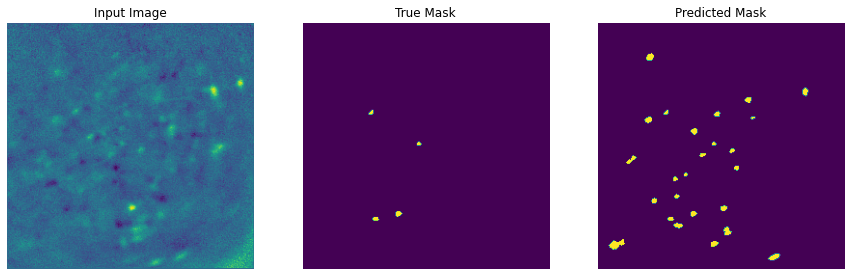

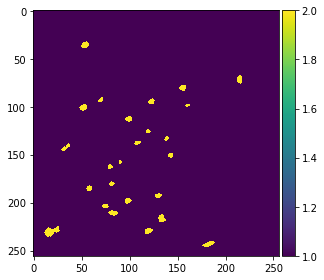

In [6]:
# %debug

def display_example(sequencer, batch_index, sample_index):

    i = batch_index
    j = sample_index
    xs, ys, sws = sequencer[i]
    # imshow(y.reshape(y.shape[:2]))
    j = 2
    x = xs[j]
    x_middle = x[3]
    y = ys[j]
    sw = sws[j]

    to_display = [img.reshape(img.shape[:2]) for img in [x_middle, y, sw]]
    display(to_display)
    imshow(to_display[2])

display_example(validation_sequencer, 0, 2)

In [14]:
len(validation_generator)

2

In [22]:
a = np.array([2,3,0,1]).reshape((2,2))
np.minimum(a, np.ones_like(a))
sum([a, np.ones_like(a)])


array([[3, 4],
       [1, 2]])

In [88]:
validation_dataset = validation_generator.get_all_data()
validation_dataset[0].shape

(90, 8, 256, 256, 1)

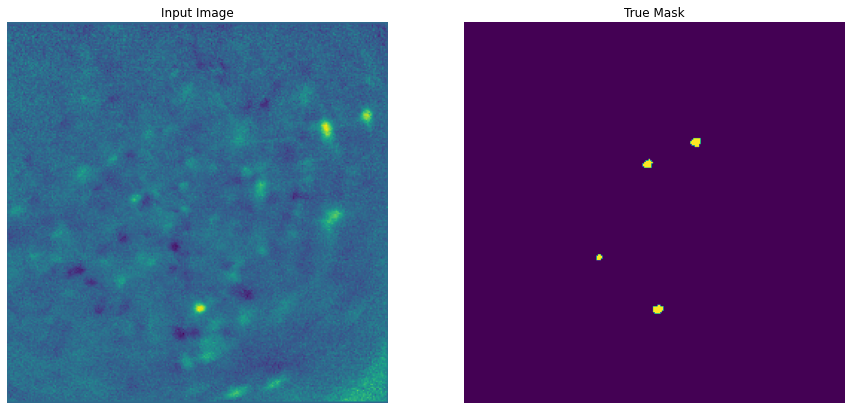

In [91]:
show_prediction(validation_dataset,1, False)

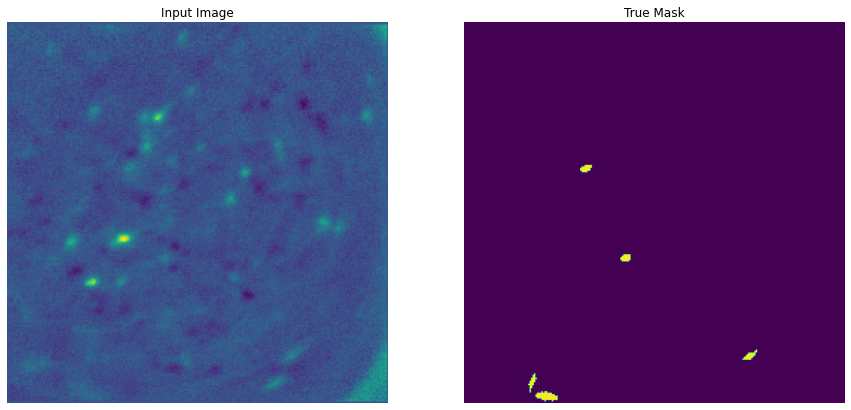

In [80]:
i = 0
ds = validation_generator
x, y = ds[i]
j = 2
x = x[j]
y = y[j]
dim = x.shape[1:3]
display([x[3].reshape(dim), y.reshape(dim)])